# Polynomial Regression with Detailed Explanation

## 📌 1. Dataset Generation
- A random seed is set to ensure the same random numbers every run (reproducibility).
- `X` values are generated in the range **[-3, +3]**.
- `y` values follow the quadratic function:

$$
y = 0.5X^2 + 1.5X + 2 + \text{noise}
$$

- Noise is added intentionally to make the dataset realistic and not perfectly clean.
- The scatter plot clearly shows a **non-linear curved pattern**.

---

## 📌 2. Train–Test Split
- The dataset is split into:
  - **80% Training Set**
  - **20% Testing Set**
- `random_state=42` is used so the split remains the same in every execution.

---

## 📌 3. Simple Linear Regression
- A straight-line model (`y = mX + c`) is trained on the training data.
- The R² score on the test data is low because the dataset is **non-linear**.
- The best-fit line shows a large error visually, confirming **underfitting**.

---

## 📌 4. Polynomial Regression (Degree = 2)
- `PolynomialFeatures(degree = 2)` transforms the feature:

$$
X \rightarrow [1, X, X^2]
$$

- Linear Regression is then trained on these transformed features.
- This converts the straight-line model into a **curved quadratic model**.
- The fitted curve matches the original data pattern very well.
- R² score improves significantly.

---

## 📌 5. Polynomial Regression (Degree = 3)
- Degree is increased to 3, transforming:

$$
X \rightarrow [1, X, X^2, X^3]
$$

- The model becomes even more flexible to learn the pattern.
- This further improves the accuracy (R² score increases).
- The new smooth prediction curve is plotted using 200 evenly spaced X-values.

---

## 🔥 Very Important Concept — `fit_transform` vs `transform`

### ✅ Why `fit_transform` on Training Data?
- `fit` learns the transformation rules (feature expansion).
- `transform` applies those rules.
- `fit_transform(X_train)` means:
  - Learn polynomial expansion rules **from training data**
  - Apply them to **training data**

### ❌ Why NOT `fit_transform` on Test Data?
- If the model learns from the test data, it **sees future information**.
- This causes **data leakage** and **inflates accuracy artificially**.
- The test set must **only** be used for evaluation.

### Correct Procedure
| Dataset | Operation | Reason |
|--------|-----------|--------|
| Training Data | `fit_transform()` | Learn + apply transformation |
| Testing Data | `transform()` | Apply the same learned transformation |
| New unseen data | `transform()` | Model behaves consistently in production |

### Golden Rule
$$
\textbf{Fit on TRAIN — Transform on TRAIN, TEST, \& FUTURE DATA}
$$

---

## 📌 Final Comparison Summary

| Model | Degree | Shape | Result |
|-------|--------|--------|--------|
| Linear Regression | 1 | Straight Line | Underfitting |
| Polynomial Regression | 2 | Parabolic Curve | Good Fit |
| Polynomial Regression | 3 | More Flexible Curve | Best Fit (in this case) |

---

## 📎 Notes
- Polynomial Regression is **still Linear Regression** because coefficients are linear — only input features are expanded non-linearly.
- Increasing degree too much can cause **overfitting**.
- Always validate model performance on the **test set**.

---


In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [294]:
# ✅ Fix the random seed so that every run generates exactly the same random numbers.
# This makes the experiment reproducible.
np.random.seed(38) 

# ✅ Generate 100 random X values between -3 and +3
# np.random.rand(100, 1) → values in [0, 1)
# 6 * rand → [0, 6)
# 6 * rand - 3 → [-3, 3)
X = 6 * np.random.rand(100, 1) - 3 # Creating 100 data sets(random) (-3 helps to add the outliers)
# ✅ Generate y using a quadratic relationship + some random noise (outliers)
# True underlying function: y = 0.5 * X^2 + 1.5 * X + 2
# np.random.rand(100, 1) adds random noise so the data is not perfectly on the curve
y = 0.5 * X ** 2 + 1.5 * X + 2 + np.random.rand(100, 1)  ## 0.5 * X ** 2 + 1.5 * X + 2 - quadratic equation ax² + bx + c (np.random.rand(100, 1) - outliers )
## quadratic equation used 
# y = 0.5X² + 1.5X + 2 + outliers

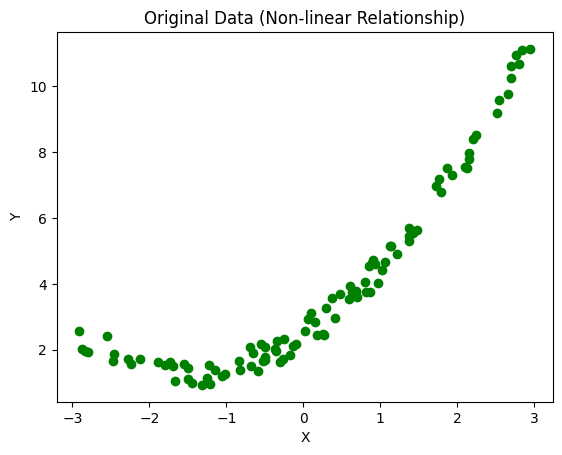

In [295]:
# ✅ Visualize the raw data to understand the pattern
plt.scatter(X, y, color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Data (Non-linear Relationship)')
plt.show()

From this plot, we can visually see a curved (non-linear) pattern.

In [296]:
from sklearn.model_selection import train_test_split
# ✅ Split the data into training and testing sets
# test_size=0.2 → 20% data for testing, 80% for training
# random_state=42 → same split every time (reproducible)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [297]:
# ✅ Implement Simple Linear Regression (straight line fit)
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
# ✅ Train (fit) the linear regression model on the training data
linear_regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [298]:
from sklearn.metrics import r2_score

# ✅ Evaluate model performance on the test set using R² score
# R² close to 1 → good fit, close to 0 or negative → poor fit
r2 = r2_score(y_test, linear_regression.predict(X_test))

print(f"Accuracy score (R² for Linear Regression): {r2}")

Accuracy score (R² for Linear Regression): 0.6596521334971635


👉 Because the true relationship is quadratic, a straight line model, cannot capture the curvature, so R² will be relatively low.

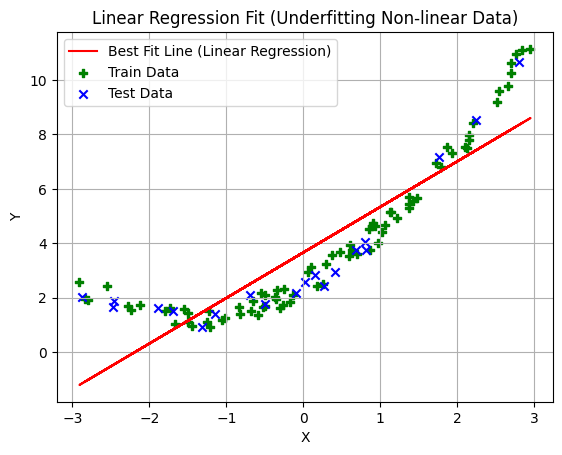

In [299]:
# ✅ Visualize the simple linear regression line vs train & test data
plt.plot(
    X_train, 
    linear_regression.predict(X_train), 
    color='red', 
    label='Best Fit Line (Linear Regression)'
)
# Training points — using 'P' marker (plus-filled marker)
plt.scatter(X_train, y_train, color='green', marker='P', label='Train Data')

# Testing points — using 'x' marker
plt.scatter(X_test, y_test, color='blue', marker='x', label='Test Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Linear Regression Fit (Underfitting Non-linear Data)')
plt.show()

| Marker | Shape            |
| ------ | ---------------- |
| `'o'`  | Circle (default) |
| `'^'`  | Triangle (up)    |
| `'v'`  | Triangle (down)  |
| `'s'`  | Square           |
| `'p'`  | Pentagon         |
| `'*'`  | Star             |
| `'D'`  | Diamond          |
| `'X'`  | Filled X         |
| `'+'`  | Plus             |
| `'.'`  | Point            |
| `'x'`  | X                |


if you look at the best fit line, we have good amount of error, lets see how we can solve this using polynomial regression

In [300]:
# ------------------------------------------------------------------------------------
# ✅ POLYNOMIAL REGRESSION (degree = 2)
# ------------------------------------------------------------------------------------

from sklearn.preprocessing import PolynomialFeatures

In [301]:
# ✅ Create a PolynomialFeatures transformer for degree 2
# include_bias=True → adds a column of 1s for the intercept term
polynomial = PolynomialFeatures(degree=2, include_bias=True)

# ✅ VERY IMPORTANT:
# We use fit_transform ONLY on the training data.
# - fit_transform(X_train): learns how to expand features (based on shape/num features)
#   and then applies the transformation to X_train.
X_train_poly = polynomial.fit_transform(X_train)

# ✅ For the test data, we ONLY call transform, NOT fit_transform.
# This ensures we apply EXACTLY the same transformation learned from the training data.
X_test_poly = polynomial.transform(X_test)

In [302]:
print("Sample of X_train_poly (degree=2):")
print(X_train_poly[:5])
# - the below out put is in the form of 1, X₁ and X₁²
# 1.00000000e+00 --> is bias 1.49958130e+00 --> X₁ 2.24874408e+00 --> X₁², polynomial° = 2

# Interpretation for degree=2 with a single feature X:
# Each row looks like: [1, X₁, X₁²]
# 1 → bias term
# X₁ → original feature
# X₁² → squared feature

Sample of X_train_poly (degree=2):
[[ 1.         -1.4995813   2.24874408]
 [ 1.          2.09775543  4.40057785]
 [ 1.          2.84861789  8.11462386]
 [ 1.         -2.2368421   5.0034626 ]
 [ 1.          1.37277964  1.88452393]]


In [303]:
print("Sample of X_test_poly (degree=2):")
print(X_test_poly[:5])

Sample of X_test_poly (degree=2):
[[ 1.         -2.88087884  8.29946288]
 [ 1.          0.41704428  0.17392593]
 [ 1.          0.81611181  0.66603848]
 [ 1.         -2.45744416  6.0390318 ]
 [ 1.         -1.69272767  2.86532695]]


In [304]:
# ✅ Train a linear regression model on the polynomial features
linear_regression = LinearRegression()
linear_regression.fit(X_train_poly, y_train)

# ✅ Predict on the test set using the polynomial model
y_pred = linear_regression.predict(X_test_poly)

# ✅ Evaluate R² score for polynomial regression (degree 2)
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Polynomial degree=2): {r2}")

R² Score (Polynomial degree=2): 0.9904794776100981


In [305]:
# ✅ Check learned coefficients (optional, for interpretation)
linear_regression.coef_

array([[0.        , 1.52177216, 0.50254276]])

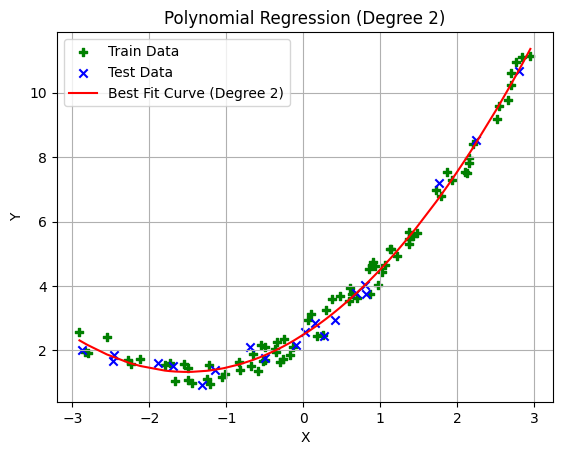

In [306]:
# ✅ Visualize the polynomial regression (degree 2)
# To plot a smooth curve, we sort X_train and corresponding predictions.
sorted_idx = X_train.flatten().argsort()
X_sorted = X_train[sorted_idx]
y_pred_sorted = linear_regression.predict(X_train_poly)[sorted_idx]

plt.scatter(X_train, y_train, color='green', marker='P', label='Train Data')
plt.scatter(X_test, y_test, color='blue', marker='x', label='Test Data')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Best Fit Curve (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Polynomial Regression (Degree 2)')
plt.show()

In [307]:
# ------------------------------------------------------------------------------------
# ✅ POLYNOMIAL REGRESSION (degree = 3) – more flexible curve
# ------------------------------------------------------------------------------------

# Now we increase the degree to 3 to see if we get an even better fit.
polynomial = PolynomialFeatures(degree=3, include_bias=True)

# Again: fit_transform ONLY on training data
X_train_poly = polynomial.fit_transform(X_train)

# Only transform on test data using the same fitted transformer
X_test_poly = polynomial.transform(X_test)

In [308]:
print("Sample of X_train_poly (degree=3):")
print(X_train_poly[:5])
# For degree=3 with one feature X, each row looks like:
# [1, X, X², X³]

Sample of X_train_poly (degree=3):
[[  1.          -1.4995813    2.24874408  -3.37217457]
 [  1.           2.09775543   4.40057785   9.23133609]
 [  1.           2.84861789   8.11462386  23.11546266]
 [  1.          -2.2368421    5.0034626  -11.1919558 ]
 [  1.           1.37277964   1.88452393   2.58703607]]


In [309]:
# Train a new linear regression model on the degree-3 polynomial features
linear_regression = LinearRegression()
linear_regression.fit(X_train_poly, y_train)

# Predict on test data
y_pred = linear_regression.predict(X_test_poly)

# R² score for degree-3 polynomial regression
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Polynomial degree=3): {r2}")

R² Score (Polynomial degree=3): 0.9899342322070093


Sample of X_new_poly (degree=3):
[[  1.          -3.           9.         -27.        ]
 [  1.          -2.96984925   8.82000455 -26.19408385]
 [  1.          -2.93969849   8.64182723 -25.40436647]
 [  1.          -2.90954774   8.46546804 -24.6306834 ]
 [  1.          -2.87939698   8.290927   -23.8728702 ]]


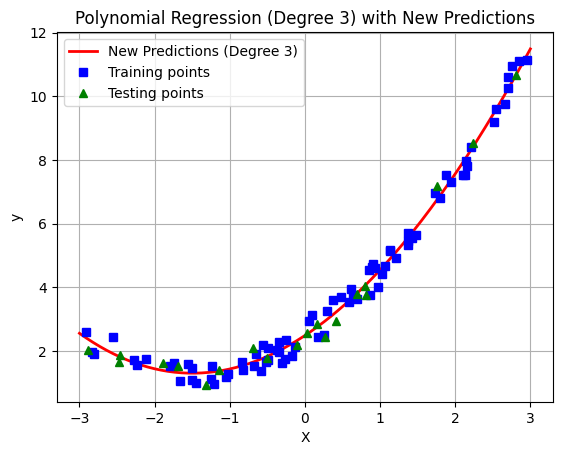

In [310]:
# ------------------------------------------------------------------------------------
# ✅ PREDICTION AND VISUALIZATION ON NEW X RANGE
# ------------------------------------------------------------------------------------

# Create a smooth range of X values from -3 to 3
X_new = np.linspace(-3, 3, 200).reshape(200, 1)

# Transform this new X using the SAME polynomial transformer (degree=3)
X_new_poly = polynomial.transform(X_new)
print("Sample of X_new_poly (degree=3):")
print(X_new_poly[:5])

# Predict y values for the smooth X range
y_new = linear_regression.predict(X_new_poly)

# Plot the polynomial regression curve and the original data points
# Best-fit curve (degree 3)
plt.plot(X_new, y_new, "r-", linewidth=2, label="New Predictions (Degree 3)")

# Training points — blue squares
plt.plot(X_train, y_train, "bs", label='Training points')  # b = blue, s = square

# Testing points — green triangles
plt.plot(X_test, y_test, "g^", label='Testing points')     # g = green, ^ = triangle

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.title('Polynomial Regression (Degree 3) with New Predictions')
plt.show()

| Code    | Meaning               |
| ------- | --------------------- |
| `"b-"`  | blue solid line       |
| `"g--"` | green dashed line     |
| `"k:"`  | black dotted line     |
| `"m-."` | magenta dash-dot line |
| `"c--"` | cyan dashed line      |
| `"y-"`  | yellow solid line     |

<br/>


| Code | Shape           |
| ---- | --------------- |
| `.`  | Point           |
| `o`  | Circle          |
| `s`  | Square          |
| `^`  | Triangle (up)   |
| `v`  | Triangle (down) |
| `D`  | Diamond         |
| `p`  | Pentagon        |
| `X`  | Filled X        |
| `*`  | Star            |


In [311]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def poly_regression(degree):
    """
    Train and visualize a Polynomial Regression model using scikit-learn Pipeline.
    
    Parameters
    ----------
    degree : int
        The degree of the polynomial to be applied on feature X. A higher degree
        allows the model to fit more complex curves:
            degree=1 → straight line (simple linear regression)
            degree=2 → parabola (quadratic regression)
            degree=3 → cubic curve
            degree=n → increasingly flexible curve
    """

    # ----------------------------------------------------------------------
    # STEP 1: CREATE a smooth X range for generating prediction curve
    # ----------------------------------------------------------------------
    # np.linspace(-3, 3, 200) generates 200 evenly spaced X values between -3 and 3.
    # reshape(200, 1) converts the array into a 2D matrix of shape (200 rows, 1 column),
    # which is the required format for scikit-learn models.
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    # ----------------------------------------------------------------------
    # STEP 2: CREATE individual components for the Pipeline
    # ----------------------------------------------------------------------
    # PolynomialFeatures expands each X into new features: [1, X, X², X³, ... X^degree].
    # include_bias=True adds the column of 1s required for model intercept.
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)

    # StandardScaler standardizes each column (feature) so all features
    # have similar scale: mean = 0, standard deviation = 1.
    # This is extremely important because polynomial X², X³, X⁴ get huge values
    # and scaling prevents numerical instability during training.
    scaler = StandardScaler()

    # LinearRegression model will learn the best coefficients (weights)
    # for the polynomial features.
    lin_reg = LinearRegression()

    # ----------------------------------------------------------------------
    # STEP 3: BUILD the Pipeline — the heart of the implementation
    # ----------------------------------------------------------------------
    # Each tuple ("name", transformer) is applied in order:
    # 1. Convert X to polynomial form
    # 2. Scale (normalize) the generated polynomial features
    # 3. Train linear regression on the transformed features
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("scaler", scaler),
        ("lin_reg", lin_reg)
    ])

    # ----------------------------------------------------------------------
    # STEP 4: TRAIN the model
    # ----------------------------------------------------------------------
    # fit(X_train, y_train) automatically performs, in sequence:
    # poly_features.fit_transform(X_train)
    # scaler.fit_transform(...)
    # lin_reg.fit(...)
    # So the full data preparation + model training happens in one line.
    poly_regression.fit(X_train, y_train)

    # ----------------------------------------------------------------------
    # STEP 5: GENERATE predictions using the trained pipeline
    # ----------------------------------------------------------------------
    # predict(X_new) applies:
    # 1. poly_features.transform(X_new)
    # 2. scaler.transform(...)
    # 3. lin_reg.predict(...)
    # Internally — exactly the same transformation applied to training data is
    # applied to new input, ensuring no data leakage.
    y_pred_new = poly_regression.predict(X_new)

    # ----------------------------------------------------------------------
    # STEP 6: VISUALIZE results — RED = prediction curve, BLUE = training dots, GREEN = testing dots
    # ----------------------------------------------------------------------
    plt.plot(
        X_new, y_pred_new,                    # X-Y coordinates of smooth curve
        'r',                                  # 'r' stands for red solid line
        label=f"Prediction Curve (Degree {degree})",
        linewidth=2                           # Line thickness
    )

    # Plot original training samples to see how well the curve fits the trained data
    plt.plot(
        X_train, y_train,
        "b.",                                 # Blue dot marker for training points
        label="Training Points"
    )

    # Plot testing samples to visually inspect model generalization
    plt.plot(
        X_test, y_test,
        "g^",                                 # Green triangle marker for testing points
        label="Testing Points"
    )

    # Final plot formatting and presentation
    plt.xlabel("X")                           # X-axis label
    plt.ylabel("y")                           # Y-axis label
    plt.title(f"Polynomial Regression using Pipeline (Degree {degree})")
    plt.legend(loc="upper left")              # Display legend
    plt.grid(True)                            # Enable grid lines
    plt.axis([-4, 4, 0, 10])                  # Fix fixed plotting range for visual consistency
    plt.show()                                # Render the plot window


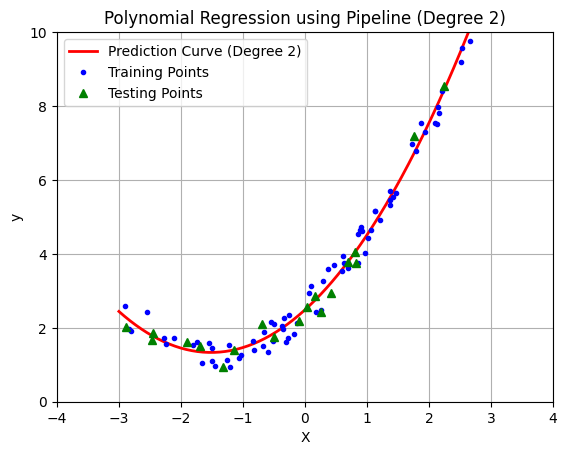

In [312]:
poly_regression(2)   # Quadratic regression

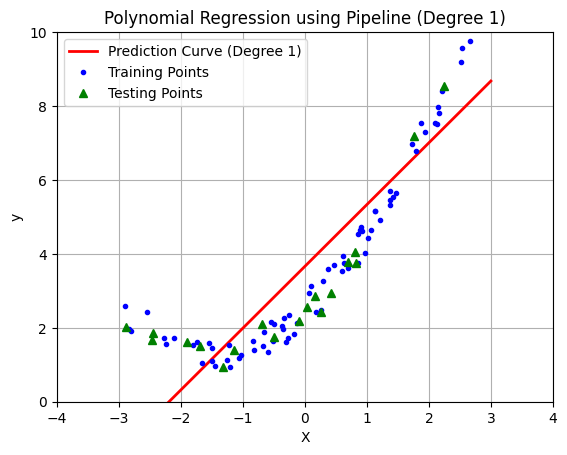

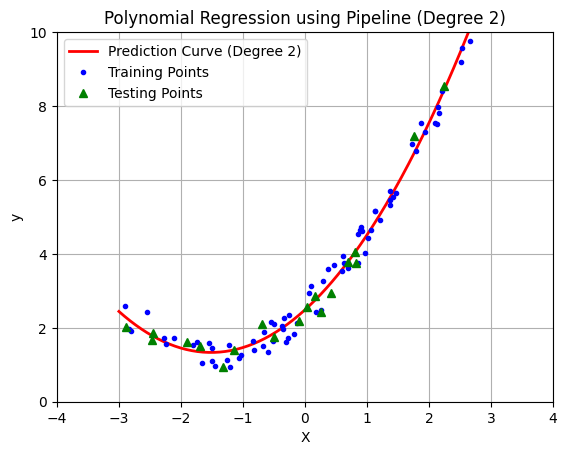

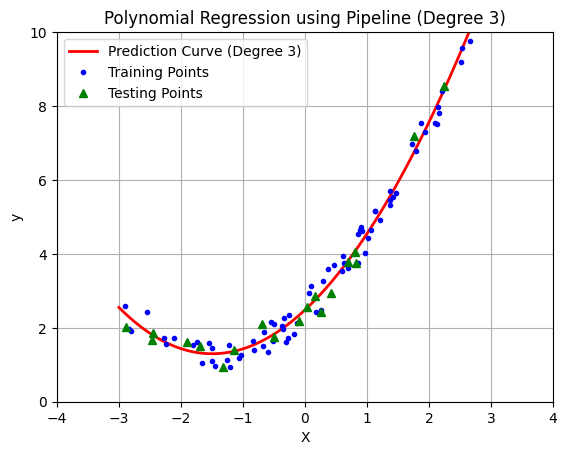

In [313]:
# Comparing multiple degress 

for degree in [1, 2, 3]:
    poly_regression(degree)


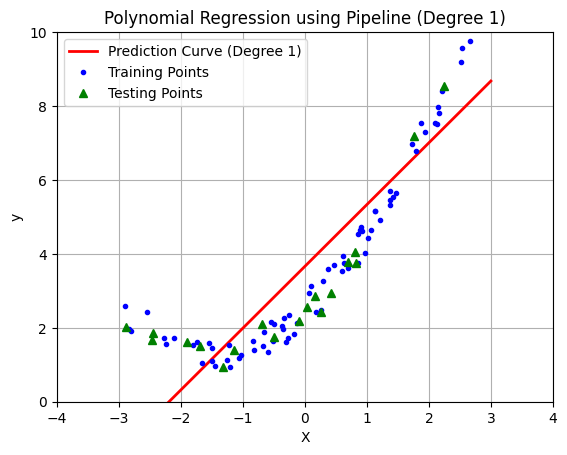

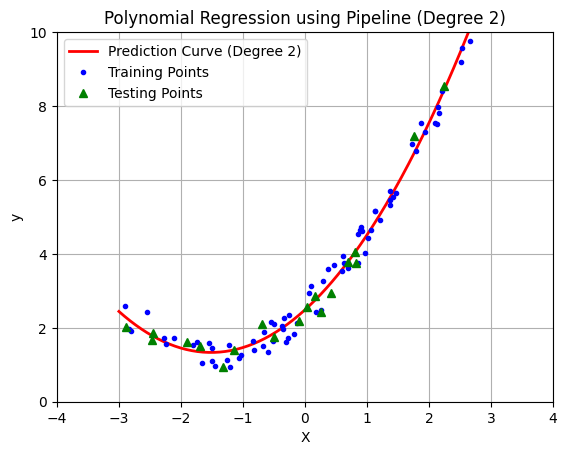

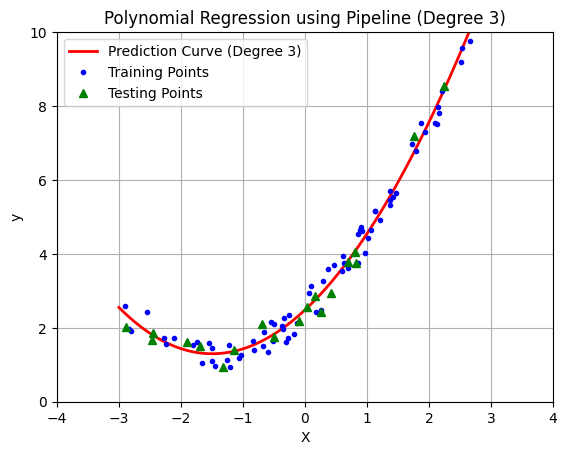

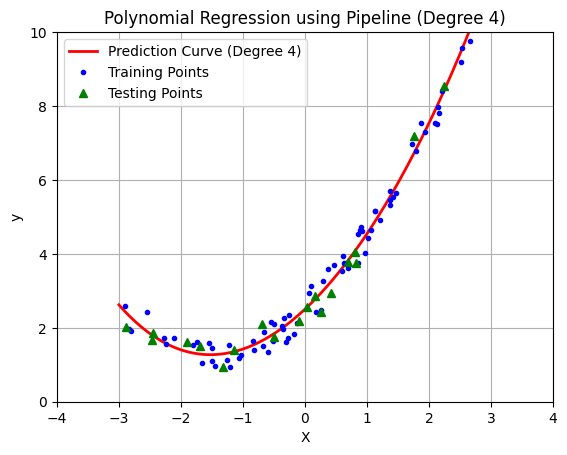

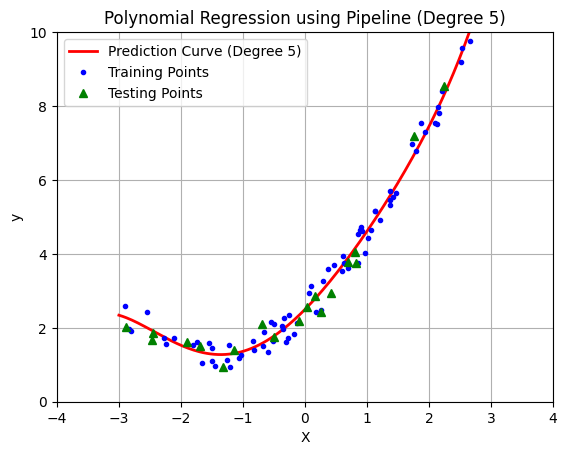

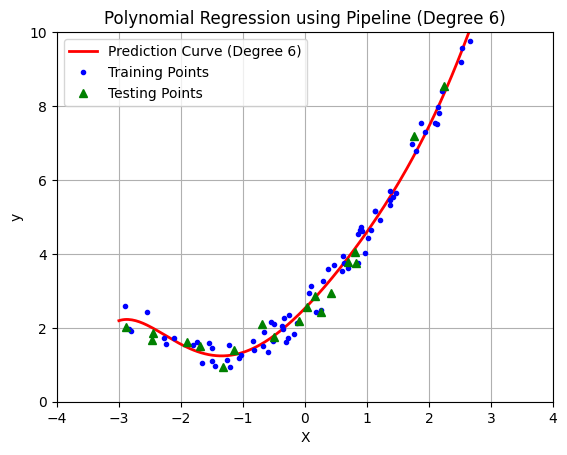

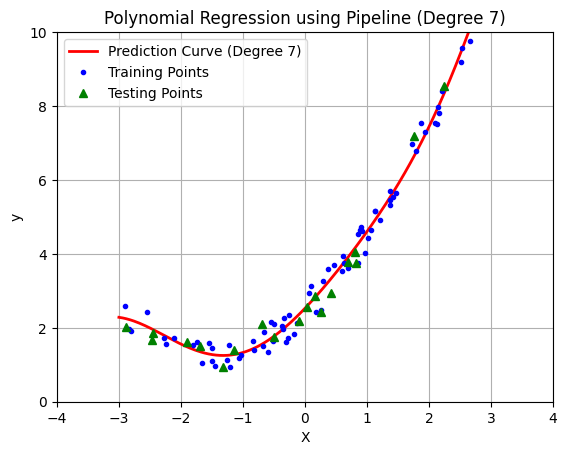

In [314]:
for degree in range(1, 8):
    poly_regression(degree)


| Degree | Data Fitting Result |
| ------ | ------------------- |
| 1      | Underfitting        |
| 2      | Best                |
| ≥ 5    | Overfitting starts  |
| ≥ 10   | Strong overfitting  |


## ✅ Helper: Automatically find best degree based on R²

In [315]:
def find_best_polynomial_degree(max_degree):
    """
    Try polynomial degrees from 1 to max_degree and select the degree
    that gives the highest R² score on the test set.
    
    Parameters
    ----------
    max_degree : int
        Maximum polynomial degree to try (inclusive).
    
    Returns
    -------
    best_degree : int
        Degree with the highest R² score on the test set.
    best_score : float
        The highest R² score obtained.
    best_model : Pipeline
        The trained Pipeline (PolynomialFeatures + StandardScaler + LinearRegression)
        corresponding to the best degree.
    scores_per_degree : dict
        Dictionary mapping degree -> R² score for all tried degrees.
    """
    
    best_degree = None          # Track which degree gives best performance
    best_score = float("-inf")  # Initialize with negative infinity (so any real score is higher)
    best_model = None           # Will store the best Pipeline model
    scores_per_degree = {}      # To store all degrees and their R² for inspection
    
    # Loop through all degrees from 1 to max_degree (inclusive)
    for degree in range(1, max_degree + 1):
        # 1️⃣ Build the Pipeline for the current degree
        model = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=True)),
            ("scaler", StandardScaler()),
            ("lin_reg", LinearRegression())
        ])
        
        # 2️⃣ Fit the model on training data
        model.fit(X_train, y_train)
        
        # 3️⃣ Predict on the test set
        y_test_pred = model.predict(X_test)
        
        # 4️⃣ Compute R² score for this degree
        r2 = r2_score(y_test, y_test_pred)
        scores_per_degree[degree] = r2
        
        print(f"Degree {degree}: R² Score = {r2:.4f}")
        
        # 5️⃣ If this degree is better than what we have seen so far, update "best"
        if r2 > best_score:
            best_score = r2
            best_degree = degree
            best_model = model  # Keep the trained model
    
    print("\n==============================")
    print(f"Best Degree: {best_degree}")
    print(f"Best R² Score on Test Set: {best_score:.4f}")
    print("==============================\n")
    
    return best_degree, best_score, best_model, scores_per_degree


In [316]:
## Search upto 10 degrees
best_degree, best_score, best_model, scores = find_best_polynomial_degree(10)


Degree 1: R² Score = 0.6597
Degree 2: R² Score = 0.9905
Degree 3: R² Score = 0.9899
Degree 4: R² Score = 0.9891
Degree 5: R² Score = 0.9878
Degree 6: R² Score = 0.9871
Degree 7: R² Score = 0.9868
Degree 8: R² Score = 0.9868
Degree 9: R² Score = 0.9878
Degree 10: R² Score = 0.9877

Best Degree: 2
Best R² Score on Test Set: 0.9905



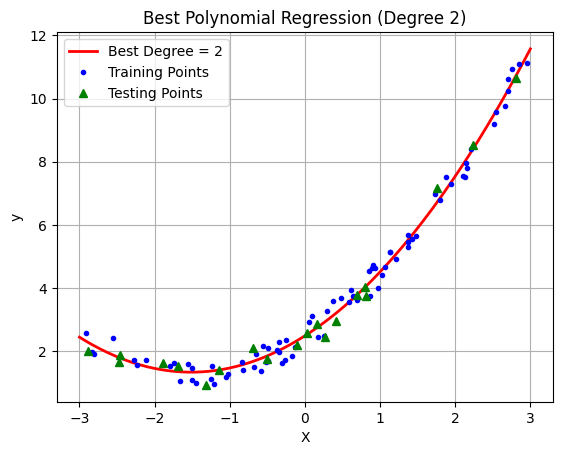

In [317]:
# Create smooth X for plotting
X_new = np.linspace(-3, 3, 200).reshape(-1, 1)

# Use the best_model (Pipeline) directly
y_new = best_model.predict(X_new)

plt.plot(X_new, y_new, "r-", linewidth=2, label=f"Best Degree = {best_degree}")
plt.plot(X_train, y_train, "b.", label="Training Points")
plt.plot(X_test, y_test, "g^", label="Testing Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.title(f"Best Polynomial Regression (Degree {best_degree})")
plt.show()


In [318]:
for degree, r2 in scores.items():
    print(f"Degree {degree}: R² = {r2:.4f}")


Degree 1: R² = 0.6597
Degree 2: R² = 0.9905
Degree 3: R² = 0.9899
Degree 4: R² = 0.9891
Degree 5: R² = 0.9878
Degree 6: R² = 0.9871
Degree 7: R² = 0.9868
Degree 8: R² = 0.9868
Degree 9: R² = 0.9878
Degree 10: R² = 0.9877


| Condition                          | Meaning      |
| ---------------------------------- | ------------ |
| Train R² low and Test R² low       | Underfitting |
| Train R² high and Test R² high     | Good Fit     |
| Train R² very high and Test R² low | Overfitting  |
